In [ ]:
# !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938113-1629952094/mvtec_anomaly_detection.tar.xz

In [ ]:
# cd Mvtec/

/content/drive/MyDrive/Machine_Learning/Mvtec


In [ ]:
# !tar -xf mvtec_anomaly_detection.tar.xz

In [ ]:
# cd drive/MyDrive/Machine_Learning/

/content/drive/MyDrive/Machine_Learning


In [ ]:
# cd ..

/content/drive/MyDrive/Machine_Learning


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def load_mvtec_dataset(data_dir, img_size=(128, 128)):
    classes = [cls for cls in os.listdir(data_dir) if not cls.startswith('.')]
    data = []
    labels = []

    for cls in classes:
        # Load training data (only good images)
        train_good_path = os.path.join(data_dir, cls, 'train', 'good')
        if os.path.exists(train_good_path):
            for img_name in os.listdir(train_good_path):
                if img_name.startswith('.'):
                    continue
                img_path = os.path.join(train_good_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                data.append(img)
                labels.append(0)  # Label '0' for good images

        # Load testing data (good and anomaly images)
        test_good_path = os.path.join(data_dir, cls, 'test', 'good')
        if os.path.exists(test_good_path):
            for img_name in os.listdir(test_good_path):
                if img_name.startswith('.'):
                    continue
                img_path = os.path.join(test_good_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                data.append(img)
                labels.append(0)  # Label '0' for good images

        # Load anomaly data
        test_path = os.path.join(data_dir, cls, 'test')
        for anomaly_type in os.listdir(test_path):
            if anomaly_type == 'good' or anomaly_type.startswith('.'):
                continue
            anomaly_dir = os.path.join(test_path, anomaly_type)
            for img_name in os.listdir(anomaly_dir):
                if img_name.startswith('.'):
                    continue
                img_path = os.path.join(anomaly_dir, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                data.append(img)
                labels.append(1)  # Label '1' for anomaly images

    data = np.array(data)
    labels = np.array(labels)
    return data, labels

data_dir = '/teamspace/studios/this_studio/Mvtec'
data, labels = load_mvtec_dataset(data_dir)
data = data / 255.0  # Normalize the data

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)


# CNN Model

In [3]:
def cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:
input_shape = X_train.shape[1:]
model = cnn_model(input_shape)

# Calculate class weights to handle class imbalance
class_weights = {0: 1.0, 1: float(len(y_train)) / sum(y_train)}

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), class_weight=class_weights)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-25 11:44:20.263344: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20974 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:35:00.0, compute capability: 8.9


Epoch 1/100


I0000 00:00:1719315862.453540   31712 service.cc:145] XLA service 0x7fb670006720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719315862.453587   31712 service.cc:153]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-06-25 11:44:22.479994: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-25 11:44:22.615688: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


 21/125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5489 - loss: 1.5575

I0000 00:00:1719315864.181113   31712 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3396 - loss: 1.3361 - val_accuracy: 0.2941 - val_loss: 0.7383
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3587 - loss: 1.1913 - val_accuracy: 0.2941 - val_loss: 0.7409
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3252 - loss: 1.2237 - val_accuracy: 0.5065 - val_loss: 0.6817
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4361 - loss: 1.1880 - val_accuracy: 0.4532 - val_loss: 0.7046
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4282 - loss: 1.1964 - val_accuracy: 0.6062 - val_loss: 0.5964
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5264 - loss: 1.1243 - val_accuracy: 0.4874 - val_loss: 0.6657
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4791 - loss: 1.1178 - val_accuracy: 0.5136 - val_loss: 0.6619
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5909 - loss: 0.9795 - val_accuracy: 0.469

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8512 - loss: 2.3009
Test Accuracy: 83.08%


In [6]:
# Predict and evaluate
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       786
           1       0.63      0.45      0.53       207

    accuracy                           0.83       993
   macro avg       0.75      0.69      0.71       993
weighted avg       0.82      0.83      0.82       993

[[732  54]
 [114  93]]


# SVM

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


In [8]:
# Reshape the data for SVM (flatten each image)
X_train_svm = X_train.reshape(X_train.shape[0], -1)
X_test_svm = X_test.reshape(X_test.shape[0], -1)

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train_svm, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Test Accuracy: {accuracy_svm * 100:.2f}%')

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred_svm))


SVM Test Accuracy: 75.23%
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       786
           1       0.39      0.34      0.37       207

    accuracy                           0.75       993
   macro avg       0.61      0.60      0.61       993
weighted avg       0.74      0.75      0.75       993



[[676 110]
 [136  71]]


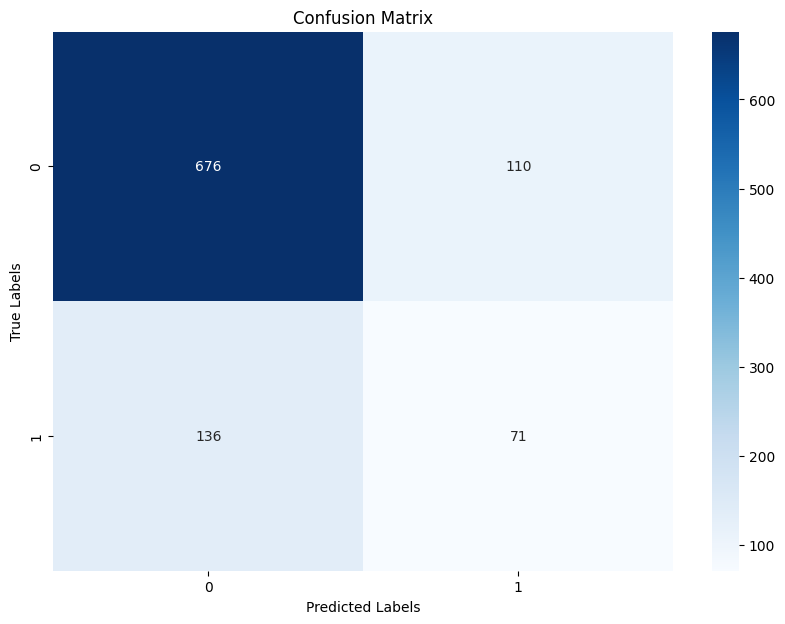

In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [18]:
# Reshape the data for KNN (flatten each image)
X_train_knn = X_train.reshape(X_train.shape[0], -1)
X_test_knn = X_test.reshape(X_test.shape[0], -1)

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train_knn, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_knn)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Test Accuracy: {accuracy_knn * 100:.2f}%')

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred_knn))

KNN Test Accuracy: 78.85%
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       786
           1       0.46      0.08      0.14       207

    accuracy                           0.79       993
   macro avg       0.63      0.53      0.51       993
weighted avg       0.73      0.79      0.73       993



[[766  20]
 [190  17]]


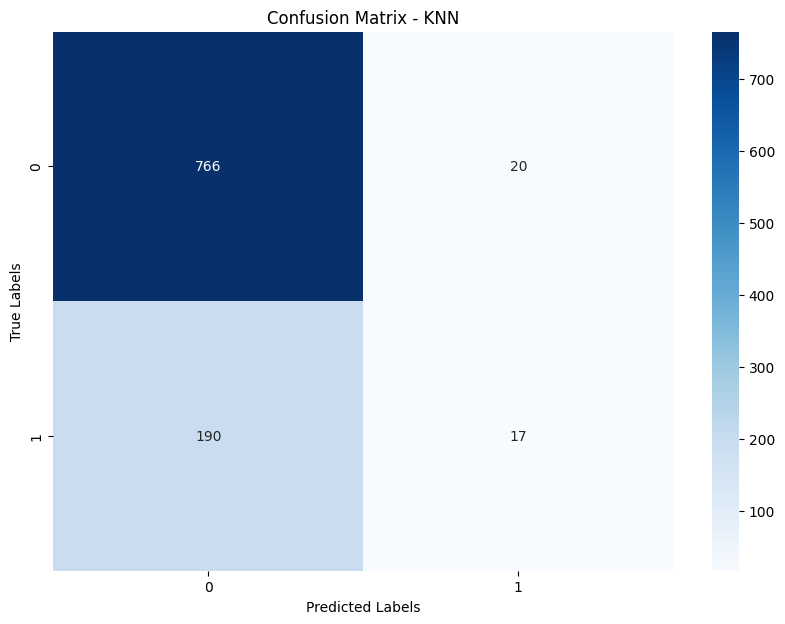

In [21]:
# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix_knn)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

/tmp/ipykernel_23767/873684085.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


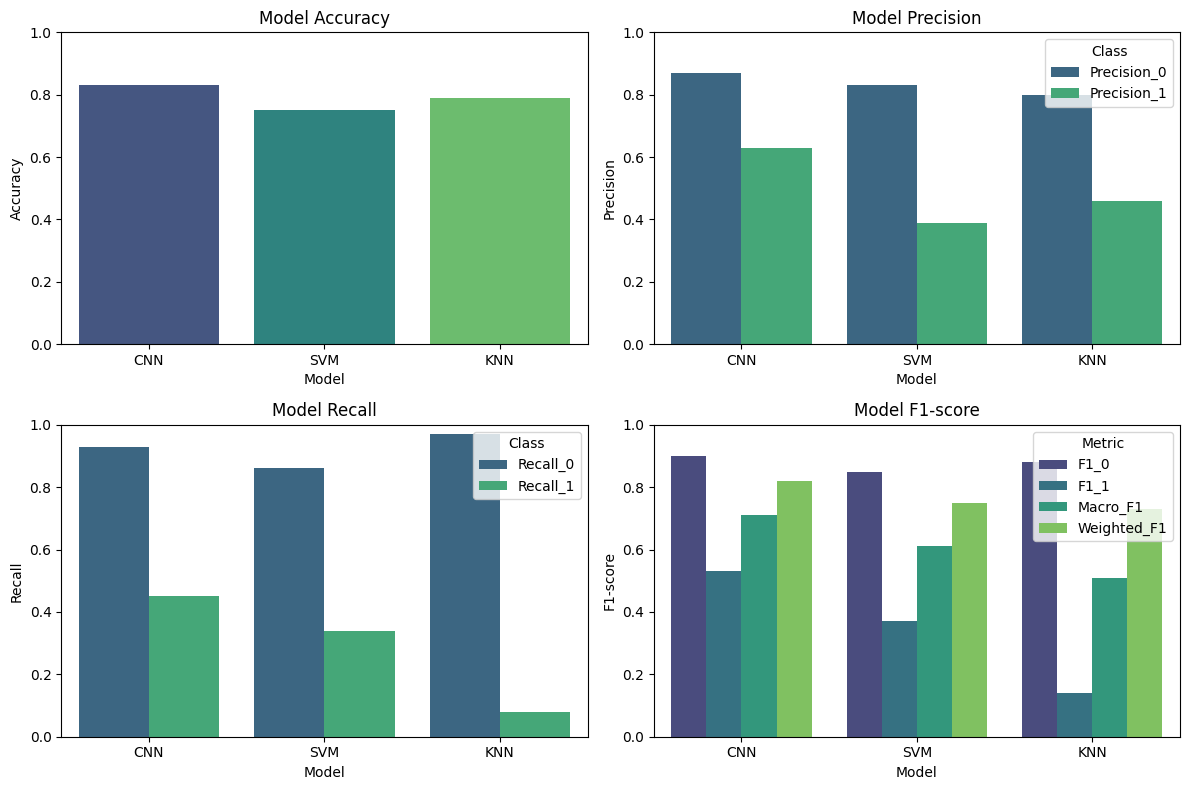

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated data for each model
data = {
    'Model': ['CNN', 'SVM', 'KNN'],
    'Accuracy': [0.8308, 0.7523, 0.7885],
    'Precision_0': [0.87, 0.83, 0.80],
    'Precision_1': [0.63, 0.39, 0.46],
    'Recall_0': [0.93, 0.86, 0.97],
    'Recall_1': [0.45, 0.34, 0.08],
    'F1_0': [0.90, 0.85, 0.88],
    'F1_1': [0.53, 0.37, 0.14],
    'Macro_F1': [0.71, 0.61, 0.51],
    'Weighted_F1': [0.82, 0.75, 0.73]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Precision for Class 0 and Class 1
plt.subplot(2, 2, 2)
precision_df = df.melt(id_vars='Model', value_vars=['Precision_0', 'Precision_1'], var_name='Class', value_name='Precision')
sns.barplot(x='Model', y='Precision', hue='Class', data=precision_df, palette='viridis')
plt.title('Model Precision')
plt.ylim(0, 1)

# Recall for Class 0 and Class 1
plt.subplot(2, 2, 3)
recall_df = df.melt(id_vars='Model', value_vars=['Recall_0', 'Recall_1'], var_name='Class', value_name='Recall')
sns.barplot(x='Model', y='Recall', hue='Class', data=recall_df, palette='viridis')
plt.title('Model Recall')
plt.ylim(0, 1)

# F1-score for Class 0 and Class 1
plt.subplot(2, 2, 4)
f1_df = df.melt(id_vars='Model', value_vars=['F1_0', 'F1_1', 'Macro_F1', 'Weighted_F1'], var_name='Metric', value_name='F1-score')
sns.barplot(x='Model', y='F1-score', hue='Metric', data=f1_df, palette='viridis')
plt.title('Model F1-score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


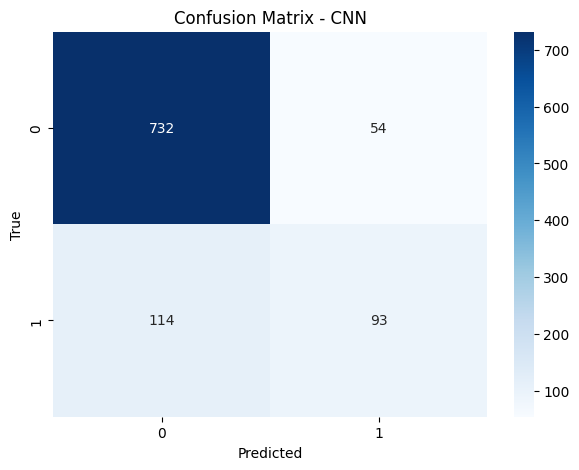

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the true labels and predicted labels for each model
true_labels = ['0', '1']

# Updated confusion matrix for CNN
cnn_confusion_matrix = np.array([[732, 54], [114, 93]])

# Plotting the confusion matrix for CNN
plt.figure(figsize=(7, 5))
sns.heatmap(cnn_confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
